In [1]:
import pandas as pd

In [12]:
import pandas as pd
import numpy as np

# Load datasets
df_clean = pd.read_csv('cleaned_v2.csv')
df_enc = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    2713 non-null   object 
 1   society          2295 non-null   object 
 2   sector           2713 non-null   object 
 3   price            2713 non-null   float64
 4   built_up_area    2713 non-null   float64
 5   price_per_sqft   2713 non-null   float64
 6   bedRoom          2713 non-null   int64  
 7   bathroom         2713 non-null   int64  
 8   balcony          2713 non-null   object 
 9   agePossession    2713 non-null   object 
 10  study_room       2713 non-null   int64  
 11  servant_room     2713 non-null   int64  
 12  store_room       2713 non-null   int64  
 13  pooja_room       2713 non-null   int64  
 14  others           2713 non-null   int64  
 15  furnishing_type  2713 non-null   object 
 16  luxury_category  2713 non-null   object 
 17  floor_category

In [14]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563 entries, 0 to 3562
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3563 non-null   object 
 1   society          3562 non-null   object 
 2   sector           3563 non-null   object 
 3   price            3563 non-null   float64
 4   price_per_sqft   3563 non-null   float64
 5   bedRoom          3563 non-null   int64  
 6   bathroom         3563 non-null   int64  
 7   balcony          3563 non-null   object 
 8   floorNum         3563 non-null   float64
 9   agePossession    3563 non-null   object 
 10  built_up_area    3563 non-null   float64
 11  study room       3563 non-null   int64  
 12  servant room     3563 non-null   int64  
 13  store room       3563 non-null   int64  
 14  pooja room       3563 non-null   int64  
 15  others           3563 non-null   int64  
 16  furnishing_type  3563 non-null   int64  
 17  luxury_score  

In [15]:
df_enc['luxury_score']=df_enc['luxury_score']/df_enc['luxury_score'].max()

In [16]:
df_enc['luxury_category']=np.where(df_enc['luxury_score']<0.2,'Low',np.where(df_enc['luxury_score']<0.5,'Medium','High'))
df_enc['floor_category']=np.where(df_enc['floorNum']<3,'Low Floor',np.where(df_enc['floorNum']<=5,'Mid Floor','High Floor'))
df_enc.drop(columns=['luxury_score','floorNum'],inplace=True)

In [17]:
df_enc

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,New Property,850.0,0,0,0,0,0,0,Low,Low Floor
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,New Property,1226.0,1,1,0,0,0,0,Medium,Mid Floor
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,New Property,1000.0,0,0,0,0,0,0,Medium,High Floor
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,Relatively New,1615.0,0,1,0,0,1,1,High,High Floor
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,Relatively New,582.0,0,0,1,0,0,0,High,Mid Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,flat,pivotal devaan,sector 84,0.37,6346.0,2,2,1,Relatively New,532.0,0,0,0,0,0,0,Medium,Mid Floor
3559,house,international city by sobha phase 1,sector 109,6.00,9634.0,5,5,3+,Relatively New,6228.0,1,1,1,1,0,0,High,Low Floor
3560,flat,ansal api celebrity suites,sector 2,0.60,8163.0,1,1,1,Moderately Old,665.0,0,0,0,0,0,1,Medium,Mid Floor
3561,house,independent,sector 43,15.50,28233.0,5,6,3,Moderately Old,5490.0,1,1,1,1,0,0,Medium,Mid Floor


In [18]:
df_clean['furnishing_type']=np.where(df_clean['furnishing_type']=='Unfurnished',0,np.where(df_clean['furnishing_type']=='Furnished',2,1))
df_clean['furnishing_type']=df_clean['furnishing_type'].astype(np.int64)

In [19]:
df_clean.rename(columns={'study_room': 'study room','servant_room': 'servant room','store_room': 'store room','pooja_room': 'pooja room'}, inplace=True)


In [20]:
df_clean.columns

Index(['property_type', 'society', 'sector', 'price', 'built_up_area',
       'price_per_sqft', 'bedRoom', 'bathroom', 'balcony', 'agePossession',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_category', 'floor_category'],
      dtype='object')

In [21]:
target_cols = df_enc.columns.tolist()
final_cols = [c for c in target_cols if c in df_clean.columns]
df_clean_final = df_clean[final_cols]

In [22]:
df_clean_final

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,Krisumi Waterside,sector 36,16.91,23999.43,4,0,0,New Property,7046.0,0,0,0,0,0,0,High,Low Floor
1,flat,Signature Park I Ext,sector 36,1.48,12384.94,2,0,0,New Property,1195.0,0,0,0,0,0,0,Medium,Low Floor
2,flat,Experion Trillion,sector 48,7.37,29246.03,4,0,0,New Property,2520.0,0,0,0,0,0,0,High,Low Floor
3,flat,Bptp Astaire Gardens,sector 70,1.68,6687.90,3,0,0,New Property,2512.0,0,0,0,0,0,0,High,Low Floor
4,flat,Elan Statement,sector 49,18.10,24896.84,4,0,0,New Property,7270.0,0,0,0,0,0,0,High,Low Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,flat,NaN,sector 76,5.62,13862.85,4,0,0,New Property,4054.0,0,0,0,0,0,0,High,Low Floor
2709,flat,Aipl Riviera Lake,sector 102,2.46,13022.76,3,0,3,New Property,1889.0,0,0,0,0,0,0,Medium,Low Floor
2710,flat,Bestech Park View Ananda,sector 102,2.46,13022.76,3,0,3,New Property,1889.0,0,0,0,0,0,0,Medium,Low Floor
2711,flat,White Wood,sector 102,2.46,13022.76,3,0,3,New Property,1889.0,0,0,0,0,0,0,Medium,Low Floor


In [23]:



# Concatenate
df_result = pd.concat([df_enc, df_clean_final], axis=0, ignore_index=True)

# Drop Duplicates
df_result.drop_duplicates(inplace=True)

# Save
df_result.to_csv('concatenated_properties_for analyzation.csv', index=False)
print("Saved to concatenated_properties.csv")

Saved to concatenated_properties.csv


In [24]:
df_result

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,signature global park 4,sector 36,0.82,7586.00,3,2,2,New Property,850.0,0,0,0,0,0,0,Low,Low Floor
1,flat,smart world gems,sector 89,0.95,8597.00,2,2,2,New Property,1226.0,1,1,0,0,0,0,Medium,Mid Floor
2,flat,breez global hill view,sohna road,0.32,5470.00,2,2,1,New Property,1000.0,0,0,0,0,0,0,Medium,High Floor
3,flat,bestech park view sanskruti,sector 92,1.60,8020.00,3,4,3+,Relatively New,1615.0,0,1,0,0,1,1,High,High Floor
4,flat,suncity avenue,sector 102,0.48,9023.00,2,2,1,Relatively New,582.0,0,0,1,0,0,0,High,Mid Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,flat,NaN,sector 76,5.62,13862.85,4,0,0,New Property,4054.0,0,0,0,0,0,0,High,Low Floor
6272,flat,Aipl Riviera Lake,sector 102,2.46,13022.76,3,0,3,New Property,1889.0,0,0,0,0,0,0,Medium,Low Floor
6273,flat,Bestech Park View Ananda,sector 102,2.46,13022.76,3,0,3,New Property,1889.0,0,0,0,0,0,0,Medium,Low Floor
6274,flat,White Wood,sector 102,2.46,13022.76,3,0,3,New Property,1889.0,0,0,0,0,0,0,Medium,Low Floor


In [25]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6264 entries, 0 to 6275
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    6264 non-null   object 
 1   society          5849 non-null   object 
 2   sector           6264 non-null   object 
 3   price            6264 non-null   float64
 4   price_per_sqft   6264 non-null   float64
 5   bedRoom          6264 non-null   int64  
 6   bathroom         6264 non-null   int64  
 7   balcony          6264 non-null   object 
 8   agePossession    6264 non-null   object 
 9   built_up_area    6264 non-null   float64
 10  study room       6264 non-null   int64  
 11  servant room     6264 non-null   int64  
 12  store room       6264 non-null   int64  
 13  pooja room       6264 non-null   int64  
 14  others           6264 non-null   int64  
 15  furnishing_type  6264 non-null   int64  
 16  luxury_category  6264 non-null   object 
 17  floor_category   62

In [26]:
df_result['sector'].value_counts().index.shape

(109,)

In [27]:
df_result['sector'].value_counts().index.unique().shape

(109,)

<Axes: xlabel='price', ylabel='Density'>

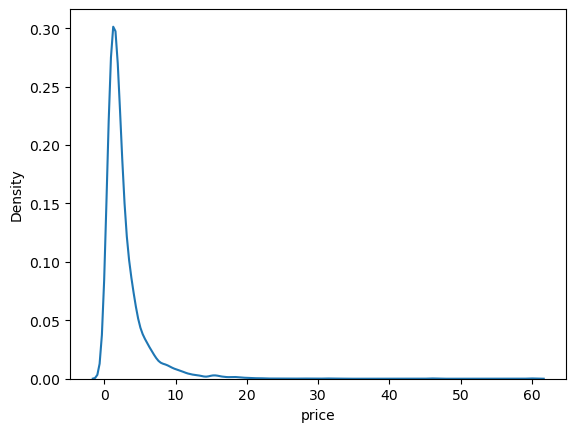

In [28]:
import seaborn as sns
sns.kdeplot(df_result['price'])

In [29]:
df_result

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,signature global park 4,sector 36,0.82,7586.00,3,2,2,New Property,850.0,0,0,0,0,0,0,Low,Low Floor
1,flat,smart world gems,sector 89,0.95,8597.00,2,2,2,New Property,1226.0,1,1,0,0,0,0,Medium,Mid Floor
2,flat,breez global hill view,sohna road,0.32,5470.00,2,2,1,New Property,1000.0,0,0,0,0,0,0,Medium,High Floor
3,flat,bestech park view sanskruti,sector 92,1.60,8020.00,3,4,3+,Relatively New,1615.0,0,1,0,0,1,1,High,High Floor
4,flat,suncity avenue,sector 102,0.48,9023.00,2,2,1,Relatively New,582.0,0,0,1,0,0,0,High,Mid Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,flat,NaN,sector 76,5.62,13862.85,4,0,0,New Property,4054.0,0,0,0,0,0,0,High,Low Floor
6272,flat,Aipl Riviera Lake,sector 102,2.46,13022.76,3,0,3,New Property,1889.0,0,0,0,0,0,0,Medium,Low Floor
6273,flat,Bestech Park View Ananda,sector 102,2.46,13022.76,3,0,3,New Property,1889.0,0,0,0,0,0,0,Medium,Low Floor
6274,flat,White Wood,sector 102,2.46,13022.76,3,0,3,New Property,1889.0,0,0,0,0,0,0,Medium,Low Floor


In [34]:
df_result['sector'].value_counts().index

Index(['sector ', 'sector 92', 'sector 37', 'sector 79', 'sohna road',
       'sector 89', 'sector 102', 'sector 69', 'sector 85', 'sector 65',
       ...
       'sector 8', 'sector 1', 'sector 58', 'sector 21', 'sector 73',
       'dwarka expressway', 'sector 15', 'sector 27', 'sector 42',
       'sector 34'],
      dtype='object', name='sector', length=109)

In [37]:
df_result.loc[df_result['sector'] == 'sector ', 'sector'] = df_result.loc[
    df_result['sector'] == 'sector ', 'society'
]


In [43]:
df_result=df_result[~df_result['sector'].isnull()]

In [46]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6193 entries, 0 to 6275
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    6193 non-null   object 
 1   society          6193 non-null   object 
 2   sector           6193 non-null   object 
 3   price            6193 non-null   float64
 4   price_per_sqft   6193 non-null   float64
 5   bedRoom          6193 non-null   int64  
 6   bathroom         6193 non-null   int64  
 7   balcony          6193 non-null   object 
 8   agePossession    6193 non-null   object 
 9   built_up_area    6193 non-null   float64
 10  study room       6193 non-null   int64  
 11  servant room     6193 non-null   int64  
 12  store room       6193 non-null   int64  
 13  pooja room       6193 non-null   int64  
 14  others           6193 non-null   int64  
 15  furnishing_type  6193 non-null   int64  
 16  luxury_category  6193 non-null   object 
 17  floor_category   61

In [45]:
df_result.loc[df_result['society'].isnull(), 'society'] = df_result.loc[
   df_result['society'].isnull(), 'sector'
]


In [48]:
df_result.drop_duplicates(inplace=True)

# Save
df_result.to_csv('concatenated_properties_for analyzation.csv', index=False)
print("Saved to concatenated_properties.csv")

Saved to concatenated_properties.csv


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_267444\246996699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result.drop_duplicates(inplace=True)


In [49]:
df_result=df_result.drop(columns=['society','price_per_sqft','study room','pooja room','others'])

In [50]:
df_result


,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,New Property,850.0,0,0,0,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,New Property,1226.0,1,0,0,Medium,Mid Floor
2,flat,sohna road,0.32,2,2,1,New Property,1000.0,0,0,0,Medium,High Floor
3,flat,sector 92,1.60,3,4,3+,Relatively New,1615.0,1,0,1,High,High Floor
4,flat,sector 102,0.48,2,2,1,Relatively New,582.0,0,1,0,High,Mid Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,flat,sector 76,5.62,4,0,0,New Property,4054.0,0,0,0,High,Low Floor
6272,flat,sector 102,2.46,3,0,3,New Property,1889.0,0,0,0,Medium,Low Floor
6273,flat,sector 102,2.46,3,0,3,New Property,1889.0,0,0,0,Medium,Low Floor
6274,flat,sector 102,2.46,3,0,3,New Property,1889.0,0,0,0,Medium,Low Floor


In [51]:
df_result.drop_duplicates(inplace=True)

# Save
df_result.to_csv('concatenated_properties_for prediction.csv', index=False)
print("Saved to concatenated_properties.csv")

Saved to concatenated_properties.csv
